# 泰坦尼克号数据科学解决方案

> By Skye | www.skye.fun

- 比赛链接：https://www.kaggle.com/c/titanic/overview/tutorials
- 原文链接：https://www.kaggle.com/startupsci/titanic/titanic-data-science-solutions

本笔记本的目标是按照工作流程，解释我们在解决方案开发过程中做出的每个决定的每个步骤和基本原理。



![](./数据科学解决方案(导图).png)

## 工作流程

根据 [Data Science Solutions](https://www.amazon.com/Data-Science-Solutions-Startup-Workflow/dp/1520545312)书中描述的七个阶段。
1. 问题定义
2. 获取训练和测试数据
3. 处理、准备、清洗数据
4. 分析、识别模式和探索数据
5. 建模、预测和解决问题
6. 可视化，报告和呈现问题解决步骤和最终解决方案
7. 提供结果

## 问题定义

根据训练数据中的乘客存活与否的信息，建立模型，在测试集中预测乘客是否存活。

注意点：
- 1912年4月15日，在她的处女航中，泰坦尼克号在与冰山相撞后沉没，2224名乘客和机组人员中有1502人死亡。即生存率为32％。
- 造成海难失事的原因之一是乘客和机组人员没有足够的救生艇。
- 尽管幸存下沉有一些运气因素，但有些人比其他人更容易生存，例如妇女，儿童和上流社会。

## 工作流目标

数据科学解决方案工作流程解决了七个主要目标。

**分类** 我们可能希望对样本进行分类。我们可能还想了解不同类的含义或与我们的目标的相关性。

**相关** 可以基于训练数据集内的可用特征来解决问题。数据集中的哪些特征对我们的目标有重大贡献？从统计学上讲，特征和目标之间是否存在相关性？随着特征值的变化，解决方案状态也会发生变化，反之亦然？这可以针对给定数据集中的数值和类别特征进行测试。我们可能还希望确定除后续目标和工作流程阶段之外的特征之间的相关性。关联某些特征可能有助于创建，补全或更正特征。

**转换** 对于建模阶段，需要准备数据。根据模型算法的选择，可能需要将所有特征转换为数值等效值。例如，将文本分类值转换为数值。

**补全** 数据准备可能还需要我们估计特征中的任何缺失值。当没有缺失值时，模型算法可能最有效。

**纠正** 我们还可以分析给定的训练数据集中的错误或可能在特征内提取值特征内的错误值，并尝试纠正这些值或排除包含错误的样本。一种方法是检测我们的样本或特征中的任何异常值。如果某项特征不对分析做出贡献，或者可能会严重影响结果，我们也可能完全丢弃该特征。

**创建** 我们是否可以基于现有的特征或一组特征创建新特征，以便新特征遵循关联，转换和完整性目标。

**图表** 如何根据数据的性质和解决方案目标选择正确的可视化图表。

## 导入相关库

In [2]:
# 数据分析和处理
import pandas as pd
import numpy as np
import random as rnd

# 可视化
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 机器学习
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## 获取数据

使用 Pandas， 讲训练数据和测试数据存入 DataFrames。

In [38]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
combine = [train_df, test_df]

## 通过描述数据来进行分析

Pandas 能够帮助我们描述数据，回答以下问题。

**哪些特征在数据中有用？**

具体特征描述可看 https://www.kaggle.com/c/titanic/data


In [39]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**哪些特征是类别特征？**

这些值将样本分类为类似样本的集合。在类别特征中，基于名字，序数，比率或区间的值？ 除此之外，这有助于我们选择适当的可视化图。

- 类别： Survived, Sex, and Embarked. Ordinal: Pclass.

**哪些特征是数值特征？**

这些值随样本而变化。 在数值特征中，值是离散的，连续的还是基于时间序列的？ 除此之外，这有助于我们选择适当的可视化图。

- 连续值: Age, Fare. 离散值: SibSp, Parch.

In [3]:
# 预览数据
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**哪些特征有多种数据类型？**
- 船票混合了数字和字母。Cabin（船舱）是字母加数字的。

**哪些特征包含错误？**

在大数据集上这一问题难以查看，但是我们可以通过检查小数据集的样本来知晓哪些特征需要修正。

- 名字特征可能包含错误或拼写错误，因为有几种方法可用于描述名字，包括标题，圆括号和用于替代或短名称的引号。

In [4]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**哪些特征包含空格，null 或空值？**

这些特征需要修正。

- Cabin > Age > Embarked 特征包含 NUll 值。

**特征的数据类型是什么？**

特征转换时有用。

- 七个特征是整数或浮点数。 在测试数据集的情况下为六。
- 五个特征是字符串(Object)。

In [5]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

**数值特征值的分布是什么？**

这能帮助我们提前了解训练数据集如何体现实际问题。

- 样本数为 891 
- Surived 是 0 1类别特征
- 大约 38% 的样本是幸存的
- 大部分乘客（>75%）没有父母或者孩子在船上
- 大约 30% 乘客有兄妹或者配偶
- 票价差异很大，<1% 的乘客票价高达 $512
- <1% 的乘客年龄在 65-80

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# 通过 `percentiles=[.61, .62]` 知道生存率为 38%
train_df.describe(percentiles=[.61, .62])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
61%,543.900000,0.000000,3.000000,32.000000,0.000000,0.000000,23.225000
62%,552.800000,1.000000,3.000000,32.000000,0.000000,0.000000,24.150000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# 通过 `percentiles=[.75, .8]` 查看 Parch 分布
train_df.describe(percentiles=[.75, .8])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
80%,713.000000,1.000000,3.000000,41.000000,1.000000,1.000000,39.687500
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# 通过 `percentiles=[.68, .69]` 查看 SibSp 分布
train_df.describe(percentiles=[.68, .69])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
68%,606.200000,1.000000,3.000000,35.000000,0.000000,0.000000,26.307500
69%,615.100000,1.000000,3.000000,35.000000,1.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`
train_df.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


**类别特征的分布如何？**

- 姓名唯一（count=unique=891）
- 65% 男性 （577/891）
- 船舱（Cabin）有重复，说明有乘客共用船舱
- Embarked 有三种取值，从 S 港登船的最多
- Ticket 的重复率最高

In [27]:
# include=['O'] 为只输出离散型变量 （输出 Object 类型）
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sdycoff, Mr. Todor",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


### 基于数据分析的假设

我们基于迄今为止所做的数据分析得出以下假设。 我们可能会在采取适当行动之前进一步验证这些假设。

**相关性**

每个特征与幸存的相关性。 希望在项目的早期阶段完成这项工作。

**补全**

1. 补全年龄特征，因为它一定与幸存相关
2. 补全港口特征，因为它可能与幸存或者其他特征相关联

**纠正**

1. Tickt 特征可以删除，因为它包含很多重复值（22%），并且Ticket和幸存应该没有关联
2. Cabin 特征可以删除，因为它包含太多 null 值
3. PassengerId 可以删除
4. Name 特征可以删除

**创建**

1. 我们可以通过 Parch 和 SibSp 创建 Family 特征，从而获得船上的家庭成员总数
2. 提取 Title 创建 Name 特征
3. 创建年龄段特征，将数值特征离散化为顺序类别特征
4. 创建 Fare 范围特征

**分类**

我们还可以根据前面提到的问题描述添加我们的假设。

1. 女士更容易存活
2. 儿童（age < ?）更容易存活
3. 高级别的船票（Pclass=1）更容易存活

## 通过数据透视特征进行分析

为了确认我们的一些观察和假设，我们可以通过聚合特征来快速分析我们的特征相关性。 我们只能在此阶段为没有任何空值的特征执行此操作。 对于分类（性别），序数（Pclass）或离散（SibSp，Parch）类型的特征，这样做也是有意义的。

- **Pclass** 可以看到明显的关联性 Pclass=1时，有62.9% 的存活率。这以特征需要加入模型中
- **Sex** Sex=female 有74%的存活率
- **SibSp和Parch** 这些特征对于某些值具有零相关性。 最好从这些单独的特征中导出一个特征或一组特征.(当我们说关系/相关时，我们并不是指在任何特定值上找到它，而是当一个增加时，另一个增加/减少（例如，你拥有的兄弟姐妹越多，你的机会就越高））。 当SibSp或Parch的数量增加时，存活率既不增加也不减少，它随机变化，与数字无关。 是的，没有5或8名SibSp的人幸免于难，但有2名SibSp的人比0名SibSp幸存下来，这意味着没有任何关系。)

In [9]:
# as_index=False , Pclass 就不回作为 Dataframe 的索引了， 默认为 True
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [5]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [6]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [7]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## 通过可视化数据来进行分析

现在我们可以继续使用可视化来确认我们的一些假设来分析数据。

### 关联数值特征

理解数值特征与目标的相关性。

直方图可用于分析像Age这样的连续数值变量。 直方图可以使用自动定义的区间或等距离范围来表示样本的分布。 这有助于我们分析特定区间（婴幼儿的生存率是否更高？）

**观察**

- 婴幼儿（age<=4，数据集中最大你年龄为 80）有较高的存活率
- 年纪最大的乘客（age=80）全部存活
- 15-25岁的 乘客很大部分没有存活
- 乘客的主要你年龄在 15-35 之间

**决策**

- 将 Age 放入模型中
- 为 Age 补全 null 值
- 应该为年龄分段

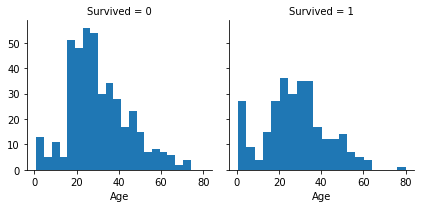

In [12]:
g = sns.FacetGrid(train_df,  col='Survived')
# 将 age 分为 20 个片段
g.map(plt.hist, 'Age', bins=20)

### 关联数值特征和序列特征

我们可以在一个图中结合多个特征来分析相关性。这种方法可以应用在数值型和有数值的分类特征中。

**观察**

- Pclass=3 的乘客最多，存活率最低，与我们的假设相符
- Pclass=2 和 Pclass=3 的婴幼儿大部分存活
- Pclass=1 的乘客大部分存活
- 不同的 Pclass 的年龄分布不同

**决策**

- 在模型训练中考虑 Pclass

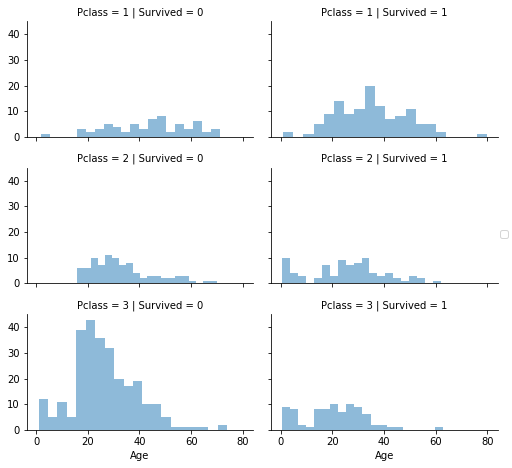

In [26]:
# aspect: 宽高比  width = size * aspect , size : height
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
# alpha: 透明度
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

###  关联类别特征

**观察**

- 女性乘客更容易存活
- Embarke = C 时男性有更高的成活率。这可能是Pclass和Embarked之间的相关性，反过来是Pclass和Survived，不一定是Embarked和Survived之间的直接相关。
- Pclass = 3 时，不同 Embarked 的男性成活率不同

**决策**

- 增加 Sex 到模型训练中
- 补全并增加 Embarked 特征到模型训练中

In [30]:
help(sns.pointplot)

Help on function pointplot in module seaborn.categorical:

pointplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x000001C164992158>, ci=95, n_boot=1000, units=None, markers='o', linestyles='-', dodge=False, join=True, scale=1, orient=None, color=None, palette=None, errwidth=None, capsize=None, ax=None, **kwargs)
    Show point estimates and confidence intervals using scatter plot glyphs.
    
    A point plot represents an estimate of central tendency for a numeric
    variable by the position of scatter plot points and provides some
    indication of the uncertainty around that estimate using error bars.
    
    Point plots can be more useful than bar plots for focusing comparisons
    between different levels of one or more categorical variables. They are
    particularly adept at showing interactions: how the relationship between
    levels of one categorical variable changes across levels of a second
    categorical variable. The l

D:\APP\Program\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\APP\Program\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


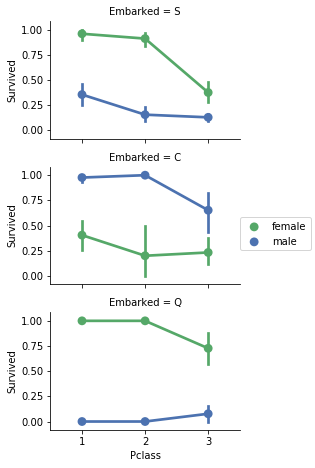

In [32]:
grid = sns.FacetGrid(train_df, row='Embarked', size = 2.2, aspect=1.6)

# sns.pointplot(x, y, hue)  'Pclass', 'Survived', 'Sex'
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### 关联类别和数值特征

Embarked，Sex，Fare

**观察**

- 船票高的乘客存活率高
- Embarked 与幸存相关

**决策**

- 考虑将 Fare 特征分段

D:\APP\Program\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


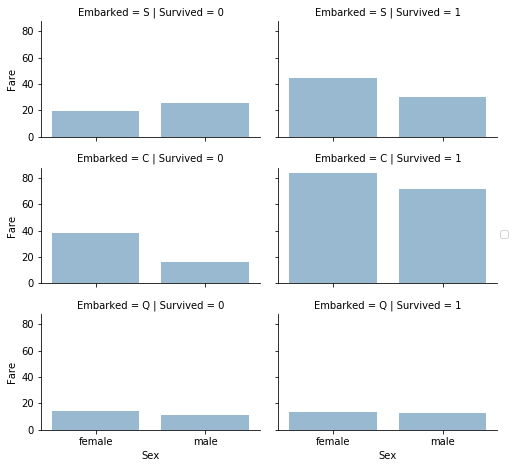

In [33]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## 处理数据

我们收集了有关数据集和解决方案要求的若干假设和决策。 到目前为止，我们没有更改单个特征来实现这些目标。现在让我们执行决策和假设来修正，创建和完成目标。

### 通过删除特征来修正数据

通过删除特征减少数据，加快处理，并简化分析。

- 根据我们的假设和决策，放弃 Cabin 和 Tickets。

- 请注意，我们同时对训练和测试数据集执行操作以保持一致。

In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [40]:
print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


### 从现有特征中创建新特征

在删除 Name 和 PassengerId 之前，先分析 Name 特征，提取 titles，并测试title与 survival 的关联。

**观察**

当我们画出 Title，Age 和 Survived 的图后，我们有了以下新的发现：

- 大多数 Title 分段与年龄字段对应准确，比如，Title 为 Master 平均年龄为 5 岁
- 不同组别 Title 与生存率有一定的区分度。
- 某些特定的 title 如 Mme，Lady，Sir 的乘客存活率较高，但某些 title 如 Don，Rev，Jonkheer 的乘客存活率不高

**结论**

- 我们决定保留这个新的 Title 特征并加入到训练模型

In [41]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# crosstab 交叉表，两个参数分别作为行列 
# 参考 https://blog.csdn.net/hustqb/article/details/78086394#%E4%BA%A4%E5%8F%89%E8%A1%A8crosstab
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


我们可以将一些 titles 替换为更一般的名字，或者分类为 Rare（稀有）

In [42]:
for dataset in combine:
    # 替换稀有的名字
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    # 修正错误的名字
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


将类别 titles 转换为有序的数值型

In [43]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


现在可以在训练和测试集中删除 Name 特征，在训练集中删除 PassengerId 特征

In [44]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### 转换类型特征

转换包含字符的特征为数值特征，在大部分模型中都需要这样转换。 这样做也帮助我们完成特征补全的目标。

In [45]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### 补全连续型数值特征

对缺失值或者 null 值特征进行估计或者补全， 从 age 开始。

考虑三种方法来补全连续型特征。

1. 一个简单的方法是使用平均值和标准差之间的随机数
2. 更准确的方式是使用相关的特征来猜测特征。在我们的例子中，将 Age, Gender 和 Pclass 认为是相关的。使用 Pclass 和 Gender 对应的中位数作为 Age 的值，当 Pclass=1 且 Gender=0 时，当 Pclass=1 且 Gender=1 时，等等…
3. 联合方法 1 和 2。我们可以根据一系列 Pclass 与 Gender 的组合，并使用第一种方法里提到的随机数来猜测缺失的 Age 值

C:\Users\xukaihui\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


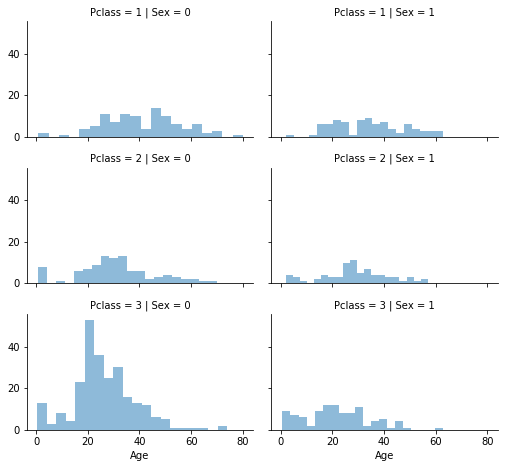

In [46]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

创建一个空的数组来保存以 Pclass X Gender 对 Age 的猜测值

In [47]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

遍历 Sex(0 或 1) Pclass(1,2,3) 的六种组合来作为 Age 的猜测值

In [50]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


创建 Age 分段，并决定它与 Surivied 的相关度

In [19]:
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise')
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or pandas.IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values of `x`.
        * sequence of scalars : Defines the bin edges all

In [51]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.370474
2,"(32.0, 48.0]",0.349432
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


根据分段更改 Age 为有序数值

In [52]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


删除 AgeBand

In [53]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### 通过联合现有特征创建新特征

 Parch and SibSp  -> FamilySize 
 

In [54]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


创建另一个特征 IsAlone

In [55]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


删除 Parch, SibSp, FamilySize 特征，使用 IsAlone 特征

In [56]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


创建人工特征: 联合 Pcass 和 Age

In [58]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
    
train_df[['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,6,2,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### 补全类别特征

Embared 特征 S，Q，C，在训练集中有两个缺失值，我们使用频次最高的值补上


In [59]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [66]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### 转换类别特征为数值型

In [68]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### 快速补全和转换数值特征

现在，我们可以使用 mode 为测试数据集中的单个缺失值补全“Fare”特征，以获取此特征最常出现的值。 我们在一行代码中完成此操作。

请注意，由于我们只替换单个值，因此我们不会创建中间新特征或进行任何进一步的相关分析以猜测缺失功能。 完成目标实现了模型算法对非空值进行操作的期望要求。

我们可能还希望将票价四舍五入到两位小数，因为它代表货币。

In [71]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


创建 FareBand

In [76]:
help(pd.qcut)

Help on function qcut in module pandas.core.reshape.tile:

qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')
    Quantile-based discretization function. Discretize variable into
    equal-sized buckets based on rank or based on sample quantiles. For example
    1000 values for 10 quantiles would produce a Categorical object indicating
    quantile membership for each data point.
    
    Parameters
    ----------
    x : 1d ndarray or Series
    q : integer or array of quantiles
        Number of quantiles. 10 for deciles, 4 for quartiles, etc. Alternately
        array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles
    labels : array or boolean, default None
        Used as labels for the resulting bins. Must be of the same length as
        the resulting bins. If False, return only integer indicators of the
        bins.
    retbins : bool, optional
        Whether to return the (bins, labels) or not. Can be useful if bins
        is given as a scalar.
 

In [79]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


根据 FareBand 将 Fare 转换为有序数值型

In [80]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,2,1,2,1,1,6
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [81]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


### 特征相关性热度图
survieved 与其它特征之间的关系

首先要注意的是，只有数值特征进行比较

正相关：如果特征A的增加导致特征b的增加，那么它们呈正相关。值1表示完全正相关。

负相关：如果特征A的增加导致特征b的减少，则呈负相关。值-1表示完全负相关。

现在让我们说两个特性是高度或完全相关的，所以一个增加导致另一个增加。这意味着两个特征都包含高度相似的信息，并且信息很少或没有变化。这样的特征对我们来说是没有价值的！

那么你认为我们应该同时使用它们吗？。在制作或训练模型时，我们应该尽量减少冗余特性，因为它减少了训练时间和许多优点。

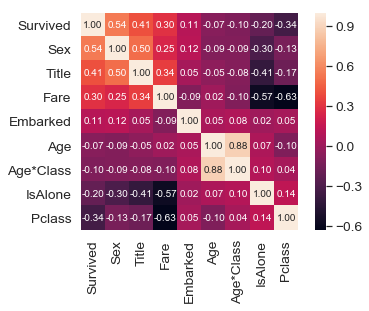

In [84]:
corrmat = train_df.corr()

k = 10
cols = corrmat.nlargest(k,'Survived')['Survived'].index  #取出与Survived相关性最大的十项
cm = np.corrcoef(train_df[cols].values.T)  #相关系数 
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm,cbar = True,annot = True,square = True ,fmt = '.2f',annot_kws = {'size': 10},yticklabels = cols.values,xticklabels = cols.values)
plt.show()


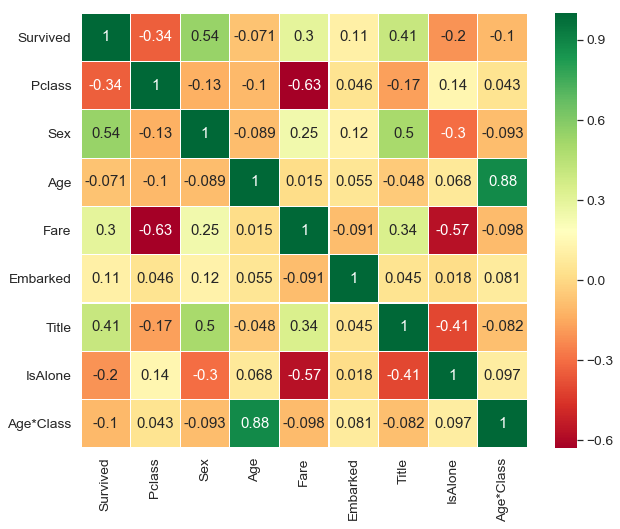

In [85]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## 模型，预测，解决问题

现在我们准备训练模型并预测所需的解决方案。 有60多种预测建模算法可供选择。 我们必须了解问题的类型和解决方案要求，以缩小到我们可以评估的少数几个模型。 我们的问题是分类和回归问题。 我们想要确定输出（生存与否）与其他变量或特征（性别，年龄，港口......）之间的关系。 我们还确定了一种机器学习，称为监督学习，因为我们正在使用给定的数据集训练我们的模型。 有了这两个标准 - 监督学习加分类和回归，我们可以将我们选择的模型缩小到几个。

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [91]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

### Logistic Regression

Logistic Regression 是在工作流程中尽早运行的有用模型。 逻辑回归通过使用逻辑函数估计概率来测量分类因变量（特征）与一个或多个自变量（特征）之间的关系，逻辑函数是累积逻辑分布。

请注意模型基于我们的训练数据集生成置信度分数。

In [92]:
help(LogisticRegression().score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model.logistic.LogisticRegression instance
    Returns the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True labels for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of self.predict(X) wrt. y.



In [95]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

acc_log

C:\Users\xukaihui\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.02

我们可以使用逻辑回归来验证我们的假设和决策。 这可以通过计算决策函数中的特征的系数来完成。

正系数增加了响应的对数几率（从而增加了概率），负系数降低了响应的对数几率（从而降低了概率）。

- 

In [96]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'IsAlone', 'Age*Class'],
      dtype='object')

In [97]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']

coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.197635
5,Title,0.388109
4,Embarked,0.370364
2,Age,0.213659
6,IsAlone,0.122867
3,Fare,-0.073902
7,Age*Class,-0.237651
0,Pclass,-0.741593


### Support Vector Machines

支持向量机是一个监督学习模型，适用于分类和回归问题。 给定一组训练样本，每个训练样本被标记为属于两个类别中的一个或另一个，SVM训练算法构建将新测试样本分配给一个类别或另一个类别的模型，使其成为非概率二元线性分类器。（即二分类模型）

请注意，该模型生成的置信度得分高于逻辑回归模型。

In [100]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

C:\Users\xukaihui\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


84.06

In [109]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\xukaihui\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.46

In [118]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']

coeff_df['Correlation'] = pd.Series(linear_svc.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,0.865140
5,Title,0.143921
4,Embarked,0.113207
6,IsAlone,0.056327
2,Age,0.020606
3,Fare,-0.028662
7,Age*Class,-0.052174
0,Pclass,-0.278452


### KNN

在模式识别中，k 近邻算法是一个非参数方法，用于分类和回归。 样本按其邻居的多数票进行分类，样本被分配给其k个最近邻居中最常见的类（k是正整数，通常很小）。 如果k = 1，则简单地将对象分配给该单个最近邻居的类。 


In [101]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

### Naive Bayes

朴素贝叶斯分类器是一系列简单的概率分类器，它基于贝叶斯定理应用特征之间的强（天真）独立假设。 朴素贝叶斯分类器具有高度可扩展性，在学习问题中需要多个变量（特征）数量的线性参数。 

模型生成的置信度得分是迄今为止评估的模型中最低的。

In [104]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.84

### Perceptron

感知器是用于二元分类器的监督学习的算法（可以决定由数字向量表示的输入是否属于某个特定类的函数）。 它是一种线性分类器，即一种分类算法，其基于将一组权重与特征向量组合的线性预测器函数进行其预测。 该算法允许在线学习，因为它一次一个地处理训练集中的元素。

In [106]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

C:\Users\xukaihui\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


79.35

In [108]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']

coeff_df['Correlation'] = pd.Series(perceptron.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=True)

,Feature,Correlation
1,Sex,67.0
6,IsAlone,20.0
4,Embarked,13.0
5,Title,-1.0
2,Age,-3.0
7,Age*Class,-6.0
3,Fare,-12.0
0,Pclass,-22.0


In [111]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

C:\Users\xukaihui\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


75.53

### Decision Tree

该模型使用决策树作为预测模型，将特征（树枝）映射到关于目标值（树叶）的结论。 目标变量可以采用有限值集的树模型称为分类树; 在这些树结构中，叶子表示类标签，分支表示导致这些类标签的特征的连接。 目标变量可以采用连续值（通常是实数）的决策树称为回归树。

到目前为止评估的模型中模型置信度得分最高。

In [112]:
# Decison Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

87.54

In [116]:
decision_tree.feature_importances_

array([0.16174926, 0.01583339, 0.0149625 , 0.09561257, 0.04841336,
       0.56858011, 0.03048879, 0.06436002])

### Random Forest

随机森林是最受欢迎的模型之一。 随机森林或随机决策森林是用于分类，回归和其他任务的集成学习方法，其通过在训练时构建多个决策树（n_estimators = 100）并输出作为类的模式的类（分类）来操作。 或者表示各树的预测（回归）。

到目前为止评估的模型中模型置信度得分最高。 我们决定使用此模型的输出（Y_pred）来创建竞赛结果提交。

In [119]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.54

## 模型评估

现在我们对所有模型的评估结果进行排序，选择一个结果最好的模型。虽然决策树和随机森林得分相同，但我们选择使用随机森林来纠正决策树可能过度拟合其训练集的情况。

In [120]:
models = pd.DataFrame({
    'Model': ['Support Vector Machine', 'KNN', 'Logistic Regression',
             'Random Forest',' Naive Bayes', 'Perception', 'Stochastic Gradient Decent', 
              'Linear SVC', 'Decison Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]
})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.54
8,Decison Tree,87.54
1,KNN,84.74
0,Support Vector Machine,84.06
2,Logistic Regression,80.02
7,Linear SVC,79.46
5,Perception,79.35
6,Stochastic Gradient Decent,75.53
4,Naive Bayes,72.84


In [121]:
submision = pd.DataFrame({"PassengerId": test_df["PassengerId"],
                         "Survived": Y_pred})

In [124]:
# Socre 0.77511, 
submision.to_csv('./output/submisson.csv', index=False)